## Лабораторная работа №5

Однофакторный регрессионный анализ

### Цель работы: научиться строить однофакторную регрессионную модель, оценивать её качество и качество ее работы.

1. Выведите данные и постройте диаграмму рассеяния. Определите зависимую и независимую переменные.
2. Проверьте на «нормальность» переменные. Сделайте выводы. 
3. Найдите корреляцию между зависимой и независимой переменными. Сделайте выводы.
4. Найдите параметры парной линейной регрессии и постройте расчётную таблицу.
5. Оцените качество параметров построенной модели: смешанный коэффициент корреляции (R2 - статистика), остаточное стандартное отклонение (RSD), F - статистика и т.п. Сделайте выводы.
6. Проверить значимость параметров уравнения регрессии и самого уравнения регрессии на уровне значимости 0,05.
7. Постройте линию регрессии на диаграмме рассеяния.

Постройте линейную регрессию для зависимости:

Производительность на одного рабочего Y (тыс. руб.) от процента новых основных средств X1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import scipy.stats as sps
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
Процент_новых_основных_средств = [3.9, 3.9, 3.7, 4.0, 3.8, 4.8, 5.4, 4.4, 5.3, 6.8, 6.0, 6.4, 6.8, 7.2, 8.0, 8.2, 8.1, 8.5, 9.6, 9.0]
Производительность = [7, 7, 7, 8, 7, 7.5, 8, 8, 8.5, 10, 9, 11, 9, 11, 12, 12, 12.5, 12, 14, 15]
# Создаём датафрейм
data = pd.DataFrame({'X1': Процент_новых_основных_средств,
                     'Y, тыс.руб': Производительность})
data

,X1,"Y, тыс.руб"
0,3.9,7.0
1,3.9,7.0
2,3.7,7.0
3,4.0,8.0
4,3.8,7.0
5,4.8,7.5
6,5.4,8.0
7,4.4,8.0
8,5.3,8.5
9,6.8,10.0


In [3]:
# Выведем описательную статистику
data.describe()

,X1,"Y, тыс.руб"
count,20.000000,20.000000
mean,6.190000,9.775000
std,1.938773,2.499868
min,3.700000,7.000000
25%,4.300000,7.875000
50%,6.200000,9.000000
75%,8.025000,12.000000
max,9.600000,15.000000


## Построим точечную диаграмму рассеяния
Она показывает, что нет идеальной зависимости, но может показаться, что данные идут по прямой линии и линейно - зависимы.

[Text(0.5, 1.0, 'Scatter plot'),
 Text(0.5, 0, 'Процент новых основных средств'),
 Text(0, 0.5, 'Производительность')]

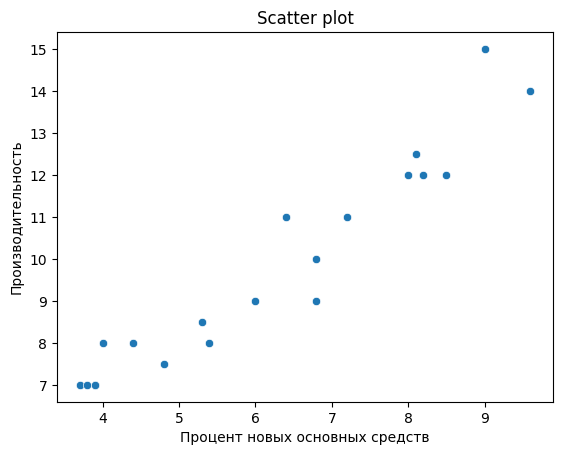

In [4]:
data_scatter = sns.scatterplot(x='X1', y='Y, тыс.руб', data=data)
data_scatter.set(title='Scatter plot', xlabel='Процент новых основных средств', 
                 ylabel='Производительность')

### Определение зависимой и независимой переменных

Зависимой перемнной является производительсность на одного рабочего, а независимой процент новых основных средств.

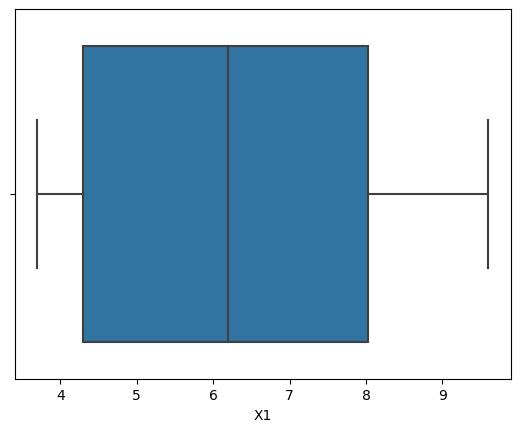

In [5]:
# Ящик с усами для переменной Процент новых основных средств
X1_box = sns.boxplot(x = 'X1', data=data)

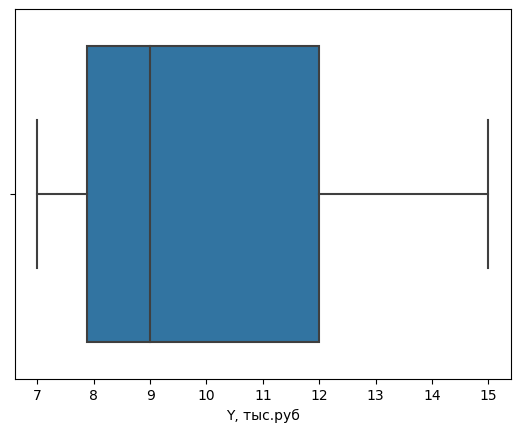

In [6]:
# Ящик с усами для переменной Производительность
Y_box = sns.boxplot(x = 'Y, тыс.руб', data=data)

Строим коробчатые диаграммы для двух наборов данных и видим, что выбросов нет.

### Строим графики плотности и проверяем на «нормальность»

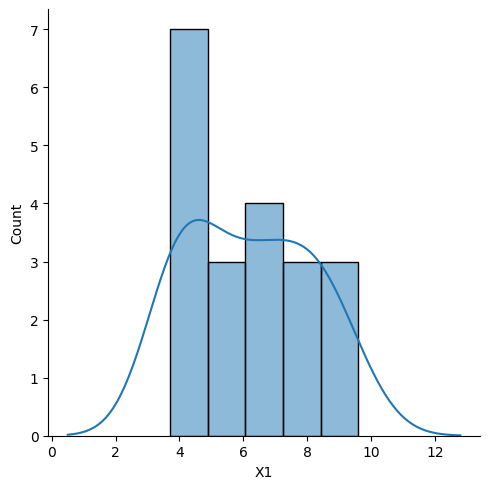

In [7]:
# Распределение плотности для переменной Процент новых основных средств
sns.displot(data['X1'], kde=True, kde_kws=dict(cut=3), bins=5)

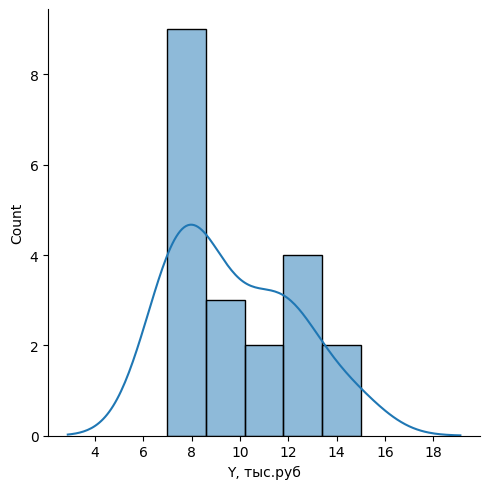

In [8]:
# Распределение плотности для переменной Производительность
sns.displot(data['Y, тыс.руб'], kde=True, kde_kws=dict(cut=3), bins=5)

In [9]:
stat, p = stats.shapiro(data['X1']) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.12061057984828949
Принять гипотезу о нормальности


Процент новых основных средств распредлён нормально

In [10]:
stat, p = stats.shapiro(data['Y, тыс.руб']) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.049541838467121124
Отклонить гипотезу о нормальности


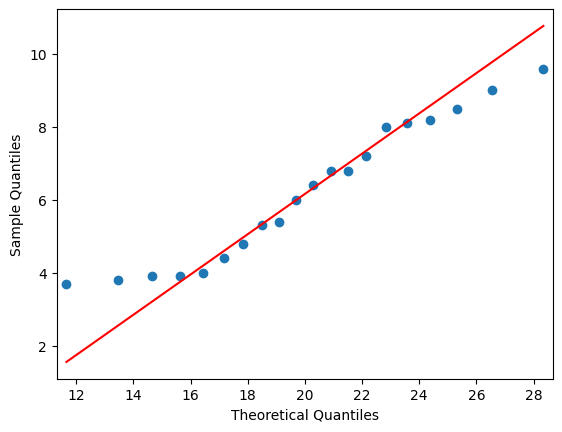

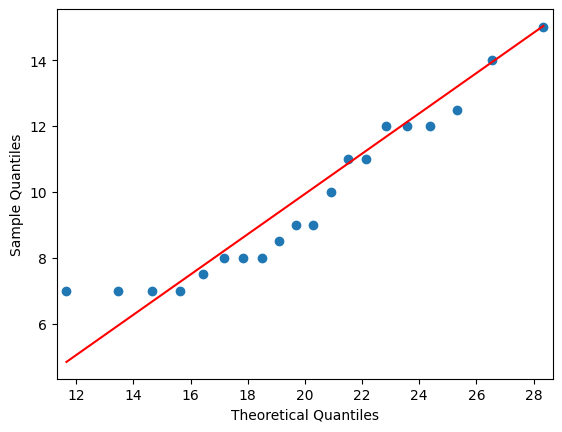

In [11]:
fig1 = sm.qqplot(data['X1'], loc = 20, scale = 5 , line='q')
fig2 = sm.qqplot(data['Y, тыс.руб'], loc = 20, scale = 5 , line='q')

Поскольку переменная отклика близка к нормальному распределению только в первом наборе данных и это подтверждается критерием Шапиро - Уилка, то посчитаем непараметрический коэффициент корреляции Спирмена.

### Корреляции между переменными

In [12]:
# Рассчитаем коэффициент корреляции Спирмена
spearmanr(data['Y, тыс.руб'], data['X1'])

SignificanceResult(statistic=0.9685593176930376, pvalue=2.543845625979683e-12)

Так как значение p - value меньше 0,05, то отвергаем нулевую гипотезу и делаем вывод о статистической значимости коэффициента корреляции. Так же между данными сильная корреляционная связь, так как абсолютное значение коэффицента корреляции Спирмена больше 0,9.

### Находим параметры линейной регрессии

С помощью метода наименьших квадратов (МНК) найдём коэффициенты.

In [13]:
param_lg = pd.read_excel('Параметры линейной регрессии.xlsx', index_col=None,usecols=None)
param_lg.drop(columns = ['Unnamed: 0', 'Unnamed: 1'], axis = 1)

,"X1, %","Y, тыс.руб",X1 - ср(X1),Y - ср(Y),X1 - ср(X1)*Y - ср(Y),(X1 - ср(X1))^2,(Y - ср(Y))^2,b,a
0,3.90,7.000,-2.290000e+00,0.810,-1.85490,5.2441,0.6561,1.235753,2.12569
1,3.90,7.000,-2.290000e+00,0.810,-1.85490,5.2441,0.6561,NaN,NaN
2,3.70,7.000,-2.490000e+00,0.810,-2.01690,6.2001,0.6561,NaN,NaN
3,4.00,8.000,-2.190000e+00,1.810,-3.96390,4.7961,3.2761,NaN,NaN
4,3.80,7.000,-2.390000e+00,0.810,-1.93590,5.7121,0.6561,NaN,NaN
5,4.80,7.500,-1.390000e+00,1.310,-1.82090,1.9321,1.7161,NaN,NaN
6,5.40,8.000,-7.900000e-01,1.810,-1.42990,0.6241,3.2761,NaN,NaN
7,4.40,8.000,-1.790000e+00,1.810,-3.23990,3.2041,3.2761,NaN,NaN
8,5.30,8.500,-8.900000e-01,2.310,-2.05590,0.7921,5.3361,NaN,NaN
9,6.80,10.000,6.100000e-01,3.810,2.32410,0.3721,14.5161,NaN,NaN


Таким образом, модель регрессионного анализа может быть записана в виде
𝑦̂i = a + b*𝑥i = 2,126 + 1,236*𝑥i.

In [14]:
reg = sps.linregress(Процент_новых_основных_средств, Производительность)
print(f'Scipy function: a = {round(reg.intercept, 3)}; b = {round(reg.slope, 3)}')

Scipy function: a = 2.126; b = 1.236


Рассчитанные значения вручную и через Python совпали.

Построим линию регрессии (линия наилушего соответствия).

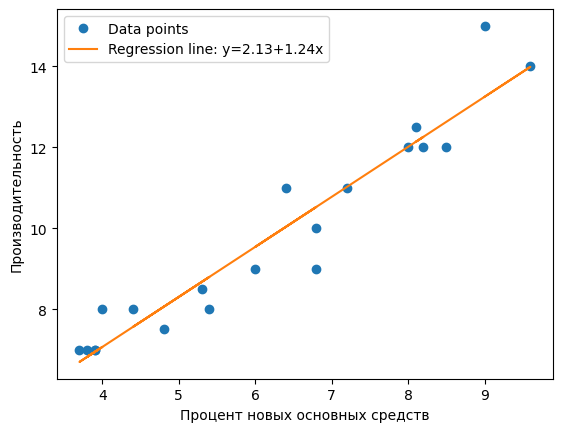

In [15]:
Y_predict = [(reg.intercept + reg.slope * x) for x in Процент_новых_основных_средств]
line = f'Regression line: y={reg.intercept:.2f}+{reg.slope:.2f}x'
fig, ax = plt.subplots()
ax.plot(Процент_новых_основных_средств, Производительность, linewidth=0, marker='o', label='Data points')
ax.plot(Процент_новых_основных_средств, Y_predict, label=line)
ax.set_xlabel('Процент новых основных средств')
ax.set_ylabel('Производительность')
ax.legend(facecolor='white')
plt.show()

### Оценка качества параметров модели

In [16]:
model = ols('Производительность ~ Процент_новых_основных_средств', data=data). fit ()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Производительность   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           3.05e-11
Time:                        18:21:40   Log-Likelihood:                -21.118
No. Observations:                  20   AIC:                             46.24
Df Residuals:                      18   BIC:                             48.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Коэффициент смешанной корреляции (детерминации) - 0.919. Это доля общей дисперсии проивзодительности, объясняющаяся с помощью уравнения регрессии. 91,9% вариации прозводительности объясняется процентом новых остновных средств.

Коэффициент детерминации, скорректированный по числу степеней свободы - 0.914. Нужен для того, чтобы улучшить качество модели.

Так как коэффицент детерминации высокий, то можно сказать, что в случае увеличения новых производимых средств производительность увеличивается.

### Проверка значимости параметров уравнения регрессии и самого уравнения регрессии

F - statistic - 202.9. Проверяет отношения между двумя дисперсиями.

Prob (F - statistic) близка к нулю. Поэтому отвергаем нулевую гипотезу, то есть производительность тесно связана с процентом новых основных средств.

Рассмотрим t - statistic и p - value из анализа МНК. Для обоих коэффициентов значение p - value на уровне значимости 0,05 примерно равно 0. Значит отвергаем нулевую гипотезу.

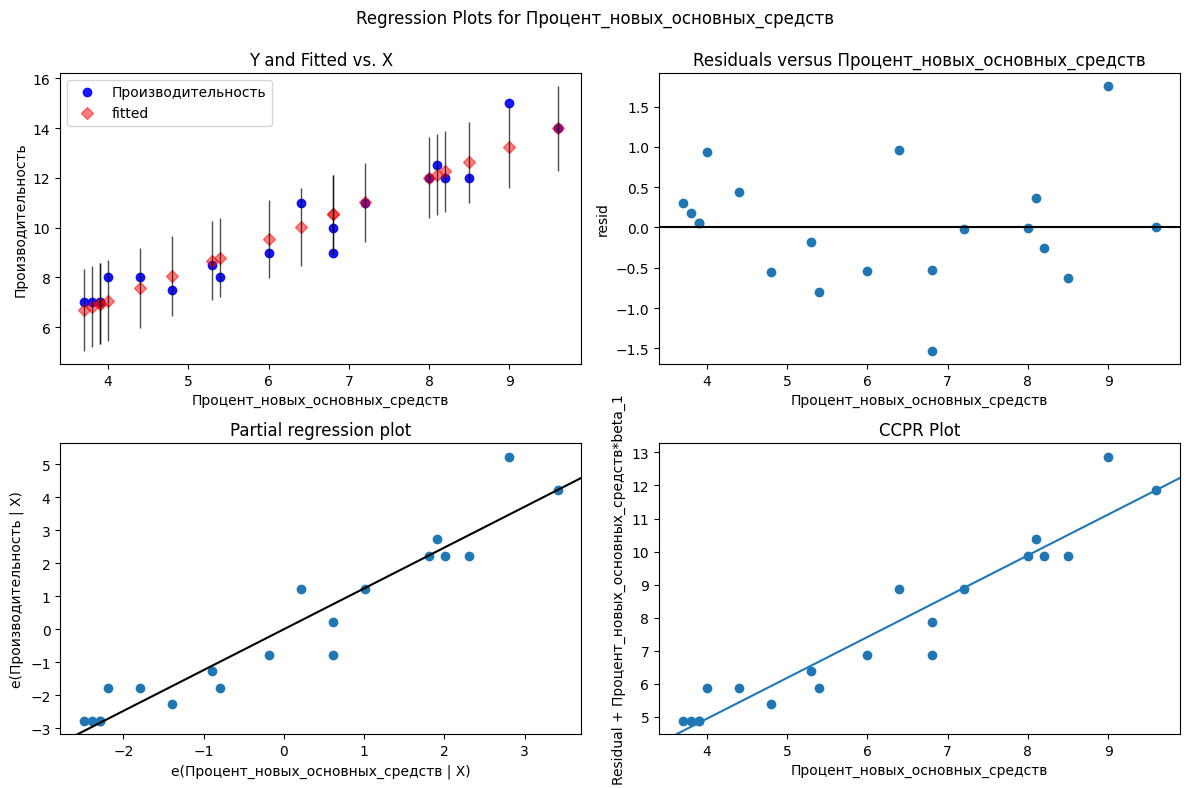

In [17]:
# определение размера графиков
fig = plt.figure(figsize=(12,8))

# построение графиков регрессии
fig = sm.graphics.plot_regress_exog(model, 'Процент_новых_основных_средств', fig=fig)

На основе графика остаточных и подобранных значений можно предположить, что гомоскедастичность не нарушена, то есть дисперсия вдоль прямой является постоянной.

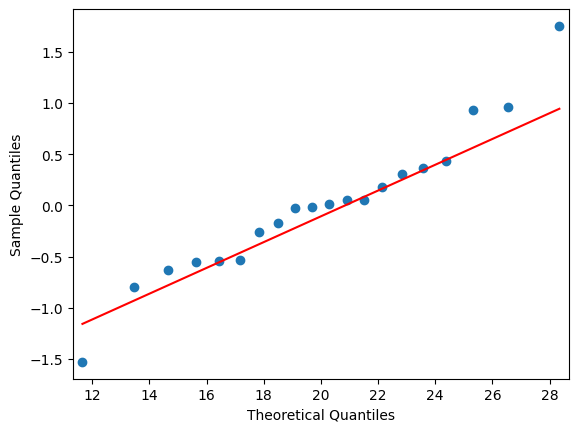

In [18]:
# Определение остатков
res = model.resid

# создание Q - Q plot
fig = sm.qqplot(res, loc = 20, scale = 5 ,  line='q')

In [19]:
# Проверяем на «нормальность»
stat, p = stats.shapiro(res) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.6390724182128906
Принять гипотезу о нормальности


Проверяем данные на нормальность и гомоскедастичность и делаем вывод о том, что остатки нормально распределены, то есть значит вывод модели надёжен.

###

1. Используйте данные из лабораторной работы № 3 (датасет, который Вы выбрали).
2. Выберите зависимую и независимую переменные, постройте линейную регрессию.
3. Постройте диаграмму рассеяния, определите наличие выбросов, проверьте распределение ваших переменных на «нормальность».
4. Найдите коэффициент корреляции между переменными, сделайте вывод.
5. Найдите коэффициенты парной линейной регрессии, определите качество найденных параметров, а также доверительные интервалы для них. Сделайте выводы.
6. Оцените качество работы модели (прогнозирование): разделите набор данных на выборку 80:20 (обучение:тест). Сделайте выводы о точности построенной модели.
7. Используя перекрестную проверку k - Fold, оцените точность вашей модели.

In [20]:
df = pd.read_csv('DNase.csv', index_col=0)
df

,Run,conc,density
1,1,0.048828,0.017
2,1,0.048828,0.018
3,1,0.195312,0.121
4,1,0.195312,0.124
5,1,0.390625,0.206
...,...,...,...
172,11,3.125000,0.980
173,11,6.250000,1.421
174,11,6.250000,1.385
175,11,12.500000,1.715


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 176
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Run      176 non-null    int64  
 1   conc     176 non-null    float64
 2   density  176 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.5 KB


In [22]:
df.describe()

,Run,conc,density
count,176.0000,176.000000,176.000000
mean,6.0000,3.106689,0.719159
std,3.1713,4.059865,0.595573
min,1.0000,0.048828,0.011000
25%,3.0000,0.341797,0.197750
50%,6.0000,1.171875,0.526500
75%,9.0000,3.906250,1.170500
max,11.0000,12.500000,2.003000


Зависимой переменной является концентрация белка, а независимой его плотность.

### Диаграмма рассеяния, выбросы, распределение переменных на «нормальность»

Text(0.5, 1.0, 'Scatter plot')

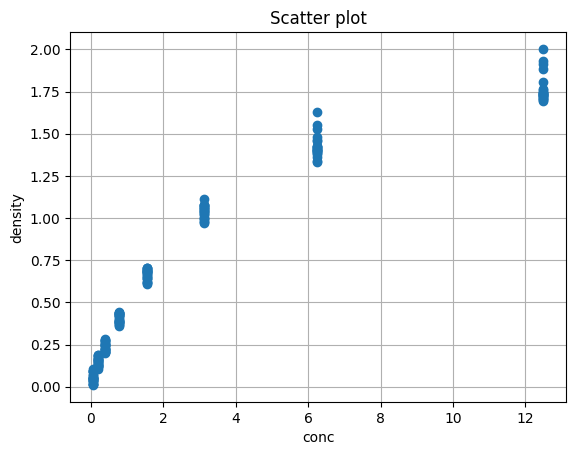

In [23]:
plt.plot(df['conc'], df['density'],'o')
plt.grid(True)
plt.xlabel('conc')
plt.ylabel('density')
plt.title('Scatter plot')

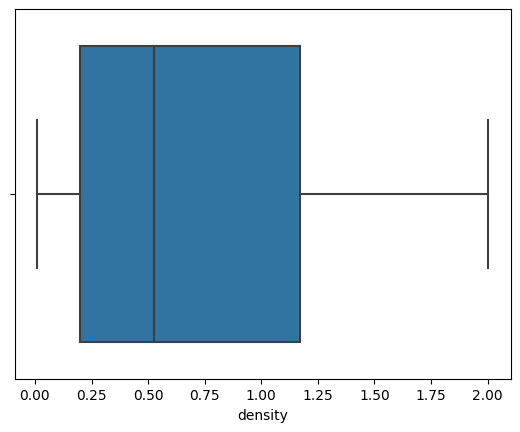

In [24]:
density_box=sns.boxplot(x=df['density'], data=df)

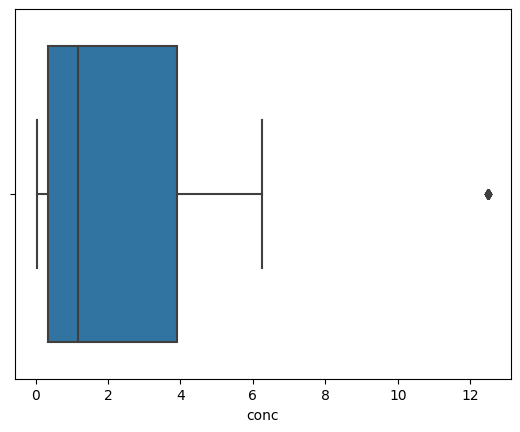

In [25]:
conc_box=sns.boxplot(x=df['conc'], data=df)

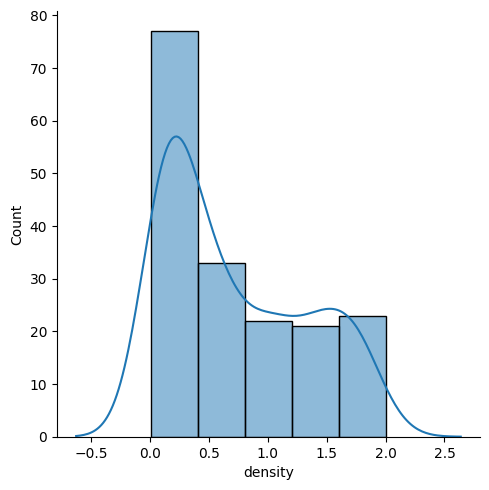

In [26]:
sns.displot(df['density'], kde=True, kde_kws=dict(cut=3), bins=5)

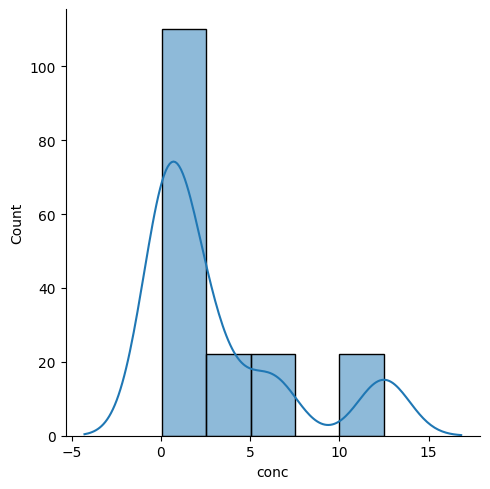

In [27]:
sns.displot(df['conc'], kde=True, kde_kws=dict(cut=3), bins=5)

In [28]:
stat, p = stats.shapiro(df['conc']) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

4.4806411709584533e-17
Отклонить гипотезу о нормальности


In [29]:
stat, p = stats.shapiro(df['density']) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

2.2297956536743158e-10
Отклонить гипотезу о нормальности


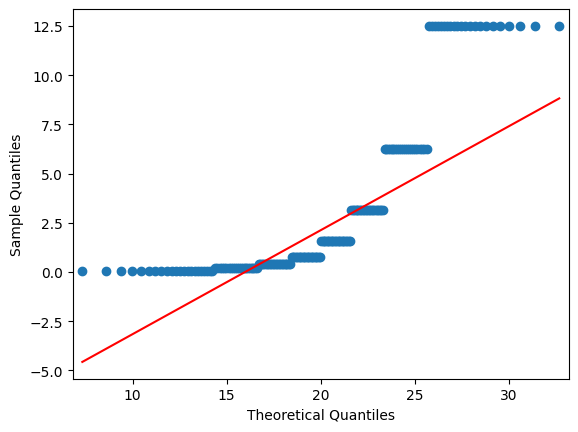

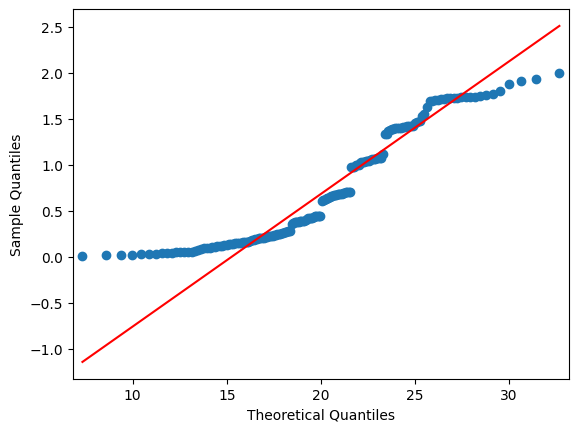

In [30]:
fig1 = sm.qqplot(df['conc'], loc = 20, scale = 5 , line='q')
fig2 = sm.qqplot(df['density'], loc = 20, scale = 5 , line='q')

Поскольку переменная отклика в обоих случаях не близка к нормальному распределению и это подтверждается критерием Шапиро - Уилка, то посчитаем непараметрический коэффициент корреляции Спирмена.

In [31]:
spearmanr(df['conc'], df['density'])

SignificanceResult(statistic=0.9921820389214486, pvalue=3.350971023686947e-159)

Отвергаем нулевую гипотезу и говорим о статистической значимости коэффициента корреляции.

### Коэффициенты парной линейной регрессии, их качество и доверительные интервалы

In [32]:
reg = sps.linregress(df['conc'], df['density'])
print(f'Scipy function: a = {round(reg.intercept, 3)}; b = {round(reg.slope,3)}')

Scipy function: a = 0.295; b = 0.137


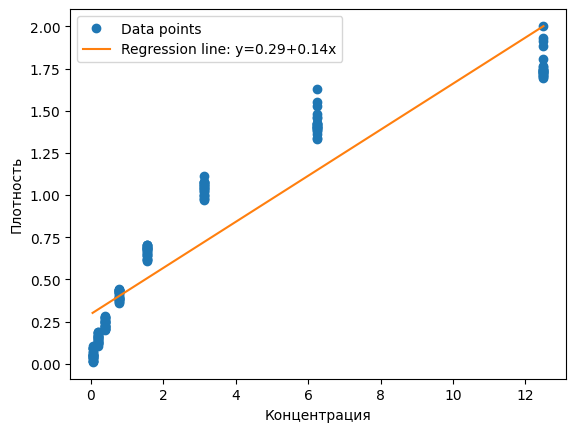

In [33]:
Y_predict = [(reg.intercept + reg.slope * x) for x in df['conc']]
line = f'Regression line: y={reg.intercept:.2f}+{reg.slope:.2f}x'
fig, ax = plt.subplots()
ax.plot(df['conc'], df['density'], linewidth=0, marker='o', label='Data points')
ax.plot(df['conc'], Y_predict, label=line)
ax.set_xlabel('Концентрация')
ax.set_ylabel('Плотность')
ax.legend(facecolor='white')
plt.show()

In [34]:
Conc = df['conc']

In [35]:
Density = df['density']

In [36]:
model=ols('Conc~Density', data=df).fit()

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Conc   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           4.70e-78
Time:                        18:21:43   Log-Likelihood:                -318.50
No. Observations:                 176   AIC:                             641.0
Df Residuals:                     174   BIC:                             647.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4572      0.176     -8.281      0.0

Коэффициент смешанной корреляции (детерминации) - 0.867. Это доля общей дисперсии проивзодительности, объясняющаяся с помощью уравнения регрессии. 86,7% вариации концентрации объясняется плотностью белка.

Коэффициент детерминации, скорректированный по числу степеней свободы - 0.866. Нужен для того, чтобы улучшить качество модели.

F - statistic - 1131. Проверяет отношения между двумя дисперсиями.

Prob (F - statistic) близка к нулю. Поэтому отвергаем нулевую гипотезу, то есть концентрация белка тесно связана с плотностью.

Рассмотрим t - statistic и p - value из анализа МНК. Для обоих коэффициентов значение p - value на уровне значимости 0,05 примерно равно 0. Значит отвергаем нулевую гипотезу.

### Разделение набора данных 80:20

In [38]:
X = df['conc'].values.reshape(-1,1)
Y = df['density'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, Y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 0.29488 + 0.13657X


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [40]:
print(len(X_test))

36


In [41]:
print(len(X_train))

140


In [42]:
Model = reg.fit(X_train, Y_train)

In [43]:
Y_pred = Model.predict(X_test)

In [44]:
# Выводим наблюдаемые (Actual Y) и теоретические - полученнные при помощи модели (Predicted Y) значения 
df = pd.DataFrame({'Actual Y': list(Y_test), 'Predicted Y': list(Y_pred)})
print(df)

   Actual Y            Predicted Y
0   [0.364]   [0.3995876386549855]
1   [0.256]  [0.34661525798575554]
2   [1.732]   [1.9887590587318837]
3    [0.36]   [0.3995876386549855]
4   [1.043]   [0.7174219226703651]
5   [0.273]  [0.34661525798575554]
6   [0.374]   [0.3995876386549855]
7   [1.699]   [1.9887590587318837]
8   [0.142]   [0.3201290676511406]
9   [0.676]   [0.5055323999934453]
10  [1.026]   [0.7174219226703651]
11  [0.052]   [0.3002644242221329]
12  [0.215]  [0.34661525798575554]
13  [0.092]   [0.3002644242221329]
14  [0.427]   [0.3995876386549855]
15  [1.459]   [1.1412009680242048]
16  [0.068]   [0.3002644242221329]
17  [0.137]   [0.3201290676511406]
18  [1.399]   [1.1412009680242048]
19  [0.108]   [0.3201290676511406]
20  [0.132]   [0.3201290676511406]
21  [0.248]  [0.34661525798575554]
22  [0.206]  [0.34661525798575554]
23  [1.466]   [1.1412009680242048]
24  [1.424]   [1.1412009680242048]
25  [1.759]   [1.9887590587318837]
26  [1.381]   [1.1412009680242048]
27  [0.701]   [0.505

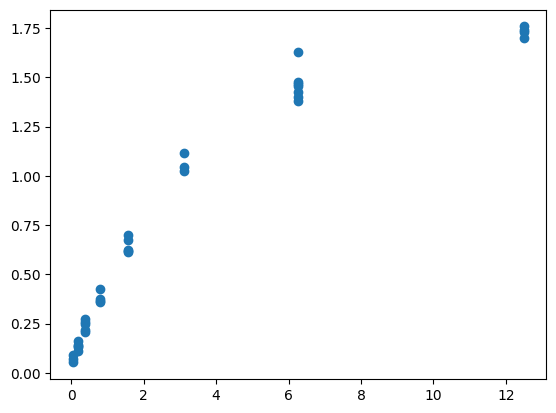

In [45]:
import matplotlib.pyplot as plt
plt.scatter(X_test, Y_test)

In [46]:
accuracy = Model.score(X_test, Y_test)
print(accuracy*100, '%')

85.39554940383368 %


Определили точность модели и видно, что она показала высокий результат.

In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.20248310747057302
Mean Squared Error: 0.052473949094218396
Root Mean Squared Error: 0.22907192995698622


Считаем метрики и видим, что их значения показывают эффективность модели.

### Используя перекрестную проверку k - Fold, оцениваем точность модели

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [49]:
cv = KFold(n_splits=3)
scores = cross_val_score(Model, X_test.reshape(-1,1), Y_test, cv=cv)
abs(scores.mean()), scores

(0.754150414055112, array([0.8003223 , 0.77510797, 0.68702097]))

Полученные значения точности, метрик и кросс - валидации говорят о том, что модель имеет высокое качество.

# Вывод:

В результате выполнения данной лабораторной работы были получены навыки проведения однофакторного регрессионного анализа. Были определены параметры линейной регрессии и были составлены соответствующие уравнения. Была проведена диагностика каждой модели.

Во 2 задании было получено высокое качество работы модели, так как датасет содержит малое количество параметров.